In [1]:
import os
import json
import numpy as np

from tools.general_utils import work_json, plot_data
from tools.free_energy_computation import get_mixture_components
from tools.binary_vle import plot_gamma_binary, compute_vapor_mole_fraction, compute_equilibrium_pressure, compute_equilibrium_temperatures

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.


# Workflow using solvation free energies to predict VLE for binary mixtures


In [2]:
## System settings ##

# Define the mixture name
main         = "simulation_systems"
mixture      = "mixture_hexane_butylamine"

# Specify either if mixture at constant pressure or constant temperature (pressures in bar / temperature in K)
system_key   = "373"

# Create results folder ##
results_path = f"{main}/{mixture}/{system_key}/results"
os.makedirs( results_path, exist_ok=True )

# Read in reference dict to get infos about simulation and reference values
ref_dict     = work_json("input_files/mixture_dataset.json")

# Reference values for given mixture
# Liquid mole fraction
x_ref = ref_dict[mixture][system_key]["reference"]["liquid_composition"]
# Vapor mole fraction
y_ref = ref_dict[mixture][system_key]["reference"]["vapor_composition"]
# Equilibrium vapor pressure
p_ref = ref_dict[mixture][system_key]["reference"]["pressure"]
# Equilibrium tempeature
t_ref = ref_dict[mixture][system_key]["reference"]["temperature"]


## Specification for post processing ##

# P-x or T-x diagram
p_x             = True

# Show detailed information from free energy computation 
show            = True

# Free energy method
free_eng_method    = "TI"
free_eng_sub_style = ""#"2d_multi_fidelity" 
integration_method = "cubicspline"

# Liquid compositions for which the solvation free energy results, as well as the densities and temperatures should be evaluated at. 
# (in case of densities and temperatures, interpolation is used. In case of solvation free energy, either 2d multifidelity or a polynomial fit of third degree is used.)
x_pred          = np.array( [ 1.0 ] )

# Fraction of simulation output that should be ommited
fraction        = 0.0

# Specifications for thermodynamic integration path
delta           = 0.0001
both_ways       = True

# Simulation folder and results save paths
main_path       = f"{main}/{mixture}/{system_key}"
dG_save_path    = f"{results_path}/%s_solvation_free_energy.png"
gamma_save_path = f"{results_path}/gamma_x.png"
y1_save_path    = f"{results_path}/y_x.png"
p_save_path     = f"{results_path}/p_x.png"
T_save_path     = f"{results_path}/T_x.png"
json_save_path  = f"{results_path}/free_eng_pp_results.json"

# Low fidelity model that should be used
multifidelity_settings_dict = { "lf_databanks": [ "input_files/multifidelity/lf_vdw_data_mix.json", "input_files/multifidelity/lf_coul_data_mix.json" ],
                                "lf_mixtures": [ "mie1_mie2", "ethanol_water" ],
                                "lf_unique_keys": [ "100_0", "1" ],
                                "lf_components": [ [ "mie1", "mie2" ], [ "ethanol", "water" ] ],
                                "lengthscales": [ [ 0.2, 5.0 ], [ 0.3, 3.0 ] ],
                                "fix_lengthscale": False,
                                "fix_hf_noise": True }

In [3]:
settings_dict = { "molecule_name_list": ref_dict[mixture]["general_information"]["molecule_names_list"], 
                  "coupling_lambdas": ref_dict[mixture][system_key]["free_energy"][free_eng_method]["lambdas_coupling"],
                  "main_path": main_path, "Mol_masses": ref_dict[mixture]["general_information"]["molecule_weights_list"], "x_pred": x_pred, "delta": delta, 
                  "both_ways": both_ways, "free_eng_method": free_eng_method, "free_eng_sub_style": free_eng_sub_style, "integration_method": integration_method,
                  "thermodynamic_settings_dict": ref_dict[mixture][system_key]["thermodynamic_settings"], "multifidelity_settings_dict": multifidelity_settings_dict, "verbose": show}
mixture_components = get_mixture_components( **settings_dict )


Insertion of hexane

Collect simulation data for composition: 1.0


 /beegfs/work/st_163811/vle_using_solvation_free_energy/tools/numeric_utils.py:169: RankWarning:Polyfit may be poorly conditioned



Insertion of butylamine

Collect simulation data for composition: 1.0


 /beegfs/work/st_163811/vle_using_solvation_free_energy/tools/numeric_utils.py:169: RankWarning:Polyfit may be poorly conditioned


In [4]:
settings_dict = { "molecule_name_list": ref_dict[mixture]["general_information"]["molecule_names_list"], 
                  "coupling_lambdas": [ [np.linspace(0,1,81).tolist(),[]],[np.linspace(0,1,81).tolist(),[]] ],
                  "main_path": 'simulation_systems/test_mixture_hexane_butylamine/373', "Mol_masses": ref_dict[mixture]["general_information"]["molecule_weights_list"], "x_pred": x_pred, "delta": 0.001, 
                  "both_ways": both_ways, "free_eng_method": free_eng_method, "free_eng_sub_style": free_eng_sub_style, "integration_method": integration_method,
                  "thermodynamic_settings_dict": ref_dict[mixture][system_key]["thermodynamic_settings"], "multifidelity_settings_dict": multifidelity_settings_dict, "verbose": show}
mixture_components2 = get_mixture_components( **settings_dict )


Insertion of hexane

Collect simulation data for composition: 1.0


 /beegfs/work/st_163811/vle_using_solvation_free_energy/tools/numeric_utils.py:169: RankWarning:Polyfit may be poorly conditioned



Insertion of butylamine

Collect simulation data for composition: 1.0


 /beegfs/work/st_163811/vle_using_solvation_free_energy/tools/numeric_utils.py:169: RankWarning:Polyfit may be poorly conditioned


In [25]:
mixture_components[0].self_solvation_free_energy, mixture_components2[0].self_solvation_free_energy # --> difference of 0.7%
mixture_components[1].self_solvation_free_energy, mixture_components2[1].self_solvation_free_energy # --> difference of 0.6%

(-14049.993866414767, -13945.020927456068)

In [6]:
mixture_components[0].self_solvation_free_energy/(8.314*373.15), mixture_components2[0].self_solvation_free_energy/(8.314*373.15)

(-4.5287950638803, -4.494958684141119)

In [9]:
np.std([-4.5287950638803, -4.494958684141119]) 

0.01691818986959026

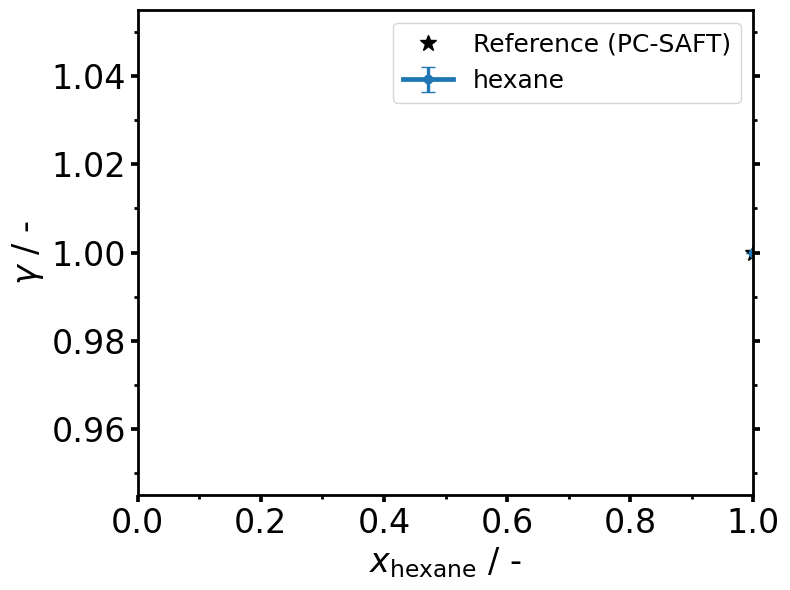

In [9]:
# Compute the activity coefficients and the pure vapor pressure for each mixture component
for mixture_component in mixture_components: 
    mixture_component.compute_gamma()
    mixture_component.compute_vapor_pressure()

# Plot the activity coefficients and its saved reference values 

plot_gamma_binary( *mixture_components, save_path = gamma_save_path)

In [ ]:
#### Compute vapor mole fraction of component one [-] ####

settings_dict = { "component": components[0], "x1": x1, "temperatures": temperatures, "dG_mix": delta_G_mix,
                  "dG_std_mix": dG_std_mix, "x_ref": gamma_x_ref, "y_ref": y_ref, "save_path": y1_save_path }

alpha, alpha_std, y1, y1_std = compute_vapor_mole_fraction( **settings_dict )

In [ ]:
def compute_equilibrium_pressure(component: str, x1: np.ndarray, temperatures: np.ndarray, y1: np.ndarray,
                                 dG_mix: np.ndarray, dG_std_mix: np.ndarray, density_mix: np.ndarray,
                                 x_ref: List=[None], y_ref: List=[None], p_ref: List=[None],
                                 save_path: str="" ) -> Tuple [np.ndarray, np.ndarray]:

    """
    Function that computes the equilibrium pressure (and standard deviation) based on free solvation energy results.

    Args:
        component (str): Low boiling component
        x1 (1D array): Compositions for which the free solvation energies are computed.
        y1 (1D array): Vapor mole fraction of component one in each composition.
        tempertaure (1D array): Temperatures for which the free solvation energies are computed.
        dG_mix (2D array): Free solvation energy difference for each component in each composition.
        dG_std_mix (2D array): Standard deviation of the free solvation energy difference for each component in each composition.
        density_mix (1D array): Mass densitiy in each composition.
        x_ref (list, optional): Liquid compositions for reference equilibrium temperatures. Defaults to [None]. 
        y_ref (list, optional): Vapor compositions for reference equilibrium temperatures. Defaults to [None]. 
        y_ref (list, optional): Reference equilibrium pressures. Defaults to [None].
        save_path (str, optional): Path where to save plot. Defaults to "".

    Returns:
        p_equib (1D array): Equilibrium pressure in each composition.
        p_equib_std (1D array): Standard deviation for the equilibrium pressure in each composition.
    """

    ## Computation explained ##

    # p_i = exp( delta G_i^{solv,i+j} /(RT) ) * RT * rho_mix * x_i ##
    # p = sum_i p_i

    ## Error propagation explained ##

    # std(p_equib) = sqrt( std(p_1)**2 + std(p_2)**2 )
    # std(p_i) = p_i * beta * std(dG_mix,i)

    p_1         = np.exp( dG_mix[0] / ( 8.314*temperatures ) ) * 8.314 * temperatures * density_mix * x1
    p_2         = np.exp( dG_mix[1] / ( 8.314*temperatures ) ) * 8.314 * temperatures * density_mix * (1-x1)

    p1_std      = p_1 * 1 / ( 8.314*temperatures ) * dG_std_mix[0]
    p2_std      = p_2 * 1 / ( 8.314*temperatures ) * dG_std_mix[1]

    p_equib     = ( p_1 + p_2 ) / 10**5
    p_equib_std = np.sqrt( p1_std**2 + p2_std**2 ) /10**5

    # Compute mean realtive deviation (MRD) to reference data, if provided #
    if any(p_ref):
        p_err  = np.mean( np.abs( (interp1d(x1,p_equib,kind="cubic")(x_ref) - p_ref ) / p_ref ) ) *100
        labels = [ "", "MRD: %.2f %%"%p_err, "", "Reference" , "$x_\mathrm{%s}$, $y_\mathrm{%s}$ / -"%(component,component), "$p$ / bar" ]
    else:
        labels = [ "", "", "$x_\mathrm{%s}$, $y_\mathrm{%s}$ / -"%(component,component), "$p$ / bar" ]

    data   = [ [x1,p_equib,None,p_equib_std], [y1,p_equib,None,p_equib_std], 
               [x_ref,p_ref,None,None], [y_ref,p_ref,None,None] ]

    colors = [ "tab:blue", "tab:blue", "black", "black" ]
    ls     = [ "solid", "solid", "None", "None"]
    marker = [ "None", "None", "*", "*" ]

    plot_data(data,labels,colors,save_path,ax_lim=[[0.0,1.0]],linestyle=ls,markerstyle=marker)

    return p_equib, p_equib_std

In [ ]:
from scipy.constants import R

def compute_equilibrium_pressure( component_one: MixtureComponent, component_two: MixtureComponent , save_path: str="", computation_method: int=2,
                                  x_ref: np.ndarray=np.array([]), y_ref: np.ndarray=np.array([]), p_ref: np.ndarray=np.array([]) ):
    """
    Function that computes and plots the equilibrium pressure for a binary mixture. The first component is always the more volatile one.
    There are two different methods computing the system pressure for a binary mixture using solvation free energies:
        1.) Utilize the simplified raoult phase equilibrium relation: p = p_{i}^{sat} \gamma_{i} x_{i} / y_{i} for each component and pure vapor pressures at boundaries
        2.) Utilize the relation between partial vapor pressure and solvation free energy: p_{i} = R T \rho_{i+j} * x_{i} * exp( delta G_i^{solv,i+j} / ( RT ) ). Where i+j denotes a mixture of i and j.
            Thus, the total pressure is given as p = p_{i} + p_{j} at matching liquid composition: xi = 1 - xj ! 
    
    Method 1.) is usuable if the provided liquid mole fractions of component two do not full fill: x1 = 1 - x2. Hence compute the system pressure individually and take the pure compoents at the boundaries.
    Method 2.) is less error sensitive, as it directly encorperates the solvation free energy and do not rely on other computed properties like gamma or the vapor mole fraction. But it is requiered that 
               the simulations are conducted at matching liquid compositions: xi = 1 - xj !

    Error propagation explained:

    Method 1.) 
    Method 2.) p = std(p_i + p_j) with std(p_i) = p_i * std(delta G_i^{solv,i+j}) * beta with std(exp(k*u)) / exp(k*u) = k*std(u)
        
    Args:
        component_one (MixtureComponent): MixtureComponent object, containing all relevant information.
        component_two (MixtureComponent): MixtureComponent object, containing all relevant information.
        save_path (str, optional): Path where the corresponding diagram should be saved. Defaults to "".
        computation_method (int, optional): Which computation method should be utilized. Defaults to 2.
        x_ref (np.ndarray, optional): Numpy array with reference liquid compositions of component 1.
        y_ref (np.ndarray, optional): Numpy array with reference vapor compositions of component 1.
        p_ref (np.ndarray, optional): Numpy array with reference equilibrium pressures.
    """

    # Extract liquid and vapor compositions
    component1 = component_one.component
    x1         = component_one.liquid_composition
    y1         = component_one.vapor_composition
    
    if computation_method == 1:
        print("Computing the system pressure with: p = p_{i}^{sat} \gamma_{i} x_{i} / y_{i}\n")

        # Extract the vapor compositions and acitivity coefficients for the components
        gamma1    = component_one.gamma
        p1_sat    = component_one.pure_vapor_pressure

        x2        = component_two.liquid_composition
        y2        = component_two.vapor_composition
        gamma2    = component_two.gamma
        p2_sat    = component_two.pure_vapor_pressure

        # Compute system pressure using the properties of each component
        p_equib_1 = x1 * gamma1 * p1_sat / y1
        p_equib_2 = x2 * gamma2 * p2_sat / y2

        # Ensure that boundaries are the correct vapor pressures
        p_equib_1[0] = p2_sat
        p_equib_2[0] = p1_sat

        # Adapt the composition of component 2 to plot the data over compositions of component 1
        x2 = 1 - np.array( x2 )

        # Total system pressure concatenate both pressures
        x1      = np.concatenate( ( x1, x2 ) )
        y1      = np.concatenate( ( y1, y2 ) )
        p_equib = np.concatenate( ( p_equib_1, p_equib_2 ) )    

    elif computation_method == 2:
        print("Computing the system pressure with: p = p_{i} + p_{j} and p_{i} = R T \rho_{i+j} * x_{i} * exp( delta G_i^{solv,i+j} / ( RT ) )\n")


        # Extract the solvation free energy of the components into the mixture
        delta_G_solv_1_12     = component_one.solvation_free_energy
        std_delta_G_solv_1_12 = component_one.solvation_free_energy_std

        # Flip values for component two, as everything will be plotted over the liquid composition of component one
        x2                    = 1 - np.array( component_two.liquid_composition )
        delta_G_solv_2_12     = np.flip( component_two.solvation_free_energy )
        std_delta_G_solv_2_12 = np.flip( component_two.solvation_free_energy_std )

        # x2 should match the closing condition with x1
        if not all( x1 + x2 == 1 ):
            print("Provided liquid compositions do not match!\n")

        # Temperatures of both mixture should be the same
        temperature       = component_one.temperature

        # Densities of both mixtures should be the same ( just in case average from both components )
        mixture_density   = np.mean( [ component_one.molar_density, np.flip( component_two.molar_density ) ], axis = 0 )

        # Compute the partial pressures in each statepoint (out of perspective of component 1)
        p_1         = np.exp( delta_G_solv_1_12 / ( R * temperature ) ) * R * temperature * mixture_density * x1
        p_2         = np.exp( delta_G_solv_2_12 / ( R * temperature ) ) * R * temperature * mixture_density * x2

        # Compute the standard deviation of the partial pressures in each statepoint (out of perspective of component 1)
        p1_std      = p_1 * 1 / ( R * temperature  ) * std_delta_G_solv_1_12
        p2_std      = p_2 * 1 / ( R * temperature  ) * std_delta_G_solv_2_12

        p_equib     = ( p_1 + p_2 ) / 1e5
        p_equib_std = np.sqrt( p1_std**2 + p2_std**2 ) / 1e5

    else:
        raise KeyError(f"Wrong computation method choosen: {computation_method}! Valid are 1 or 2.\n")
    

    # Plot the p-x diagram 

    # Compute mean realtive deviation (MRD) to reference data, if provided
    if any(p_ref):
        p_err  = np.mean( np.abs( ( interp1d( x1, p_equib, kind="cubic" )( x_ref ) - p_ref ) / p_ref ) ) *100
        labels = [ "", "MRD: %.2f %%"%p_err, "", "Reference" , "$x_\mathrm{%s}$, $y_\mathrm{%s}$ / -"%(component1,component1), "$p$ / bar" ]
    else:
        labels = [ "", "", "$x_\mathrm{%s}$, $y_\mathrm{%s}$ / -"%(component1,component1), "$p$ / bar" ]

    data   = [ [x1,p_equib,None,p_equib_std], [y1,p_equib,None,p_equib_std], 
               [x_ref,p_ref,None,None], [y_ref,p_ref,None,None] ]

    colors = [ "tab:blue", "tab:blue", "black", "black" ]
    ls     = [ "solid", "solid", "None", "None"]
    marker = [ "None", "None", "*", "*" ]

    plot_data( data, labels, colors, save_path, ax_lim=[[0.0,1.0]], linestyle=ls, markerstyle=marker )

In [ ]:
# To do: implememt a model dump to json


vdw part of the solvation free energy


Gather simulation data for component: hexane

Composition 0.0


Composition 0.1
Composition 0.2
Composition 0.3
Composition 0.4
Composition 0.5
Composition 0.6
Composition 0.7
Composition 0.8
Composition 0.9
Composition 1.0

Gather simulation data for component: butylamine

Composition 0.0
Composition 0.1
Composition 0.2
Composition 0.3
Composition 0.4
Composition 0.5
Composition 0.6
Composition 0.7
Composition 0.8
Composition 0.9
Composition 1.0

2D Multi-fidelity modeling for component: hexane

Optimization restart 1/2, f = 228.98673952804523
Optimization restart 2/2, f = 228.97635754992012

Low fidelity variance: 459.290
Low fidelity lengthscales: 0.552, 16.777
High fidelity variance: 279.586
High fidelity lengthscales: 0.274, 6.899
Phi parameter: 0.472
Low fidelity noise: 0.042
High fidelity noise: 0.046


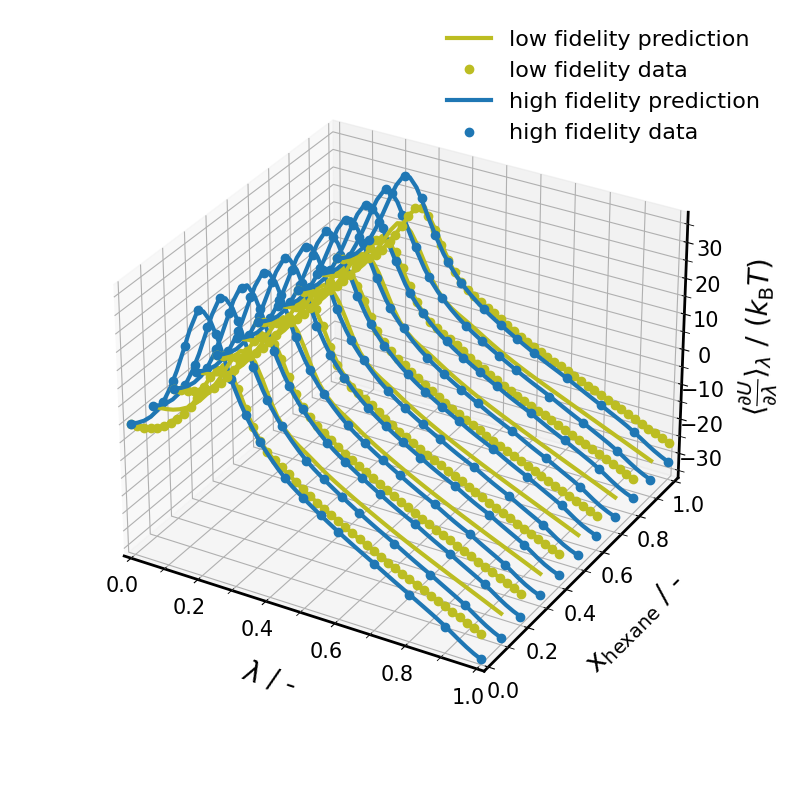


2D Multi-fidelity modeling for component: butylamine

Optimization restart 1/2, f = 19.5125405877817
Optimization restart 2/2, f = 19.473822354462186

Low fidelity variance: 556.428
Low fidelity lengthscales: 0.843, 7.266
High fidelity variance: 262.178
High fidelity lengthscales: 0.308, 9.691
Phi parameter: 0.345
Low fidelity noise: 0.000
High fidelity noise: 0.038


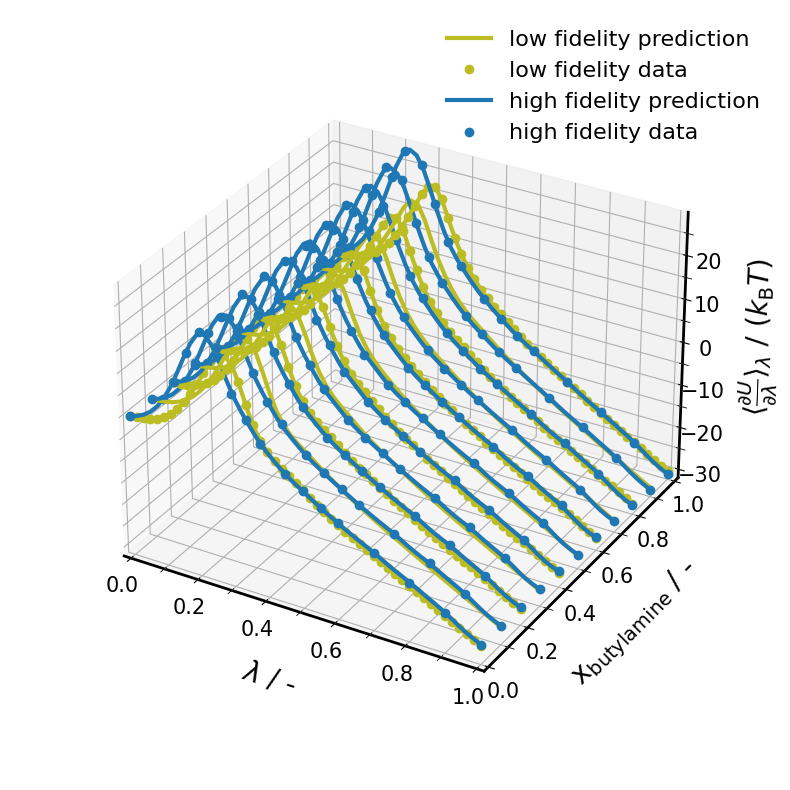

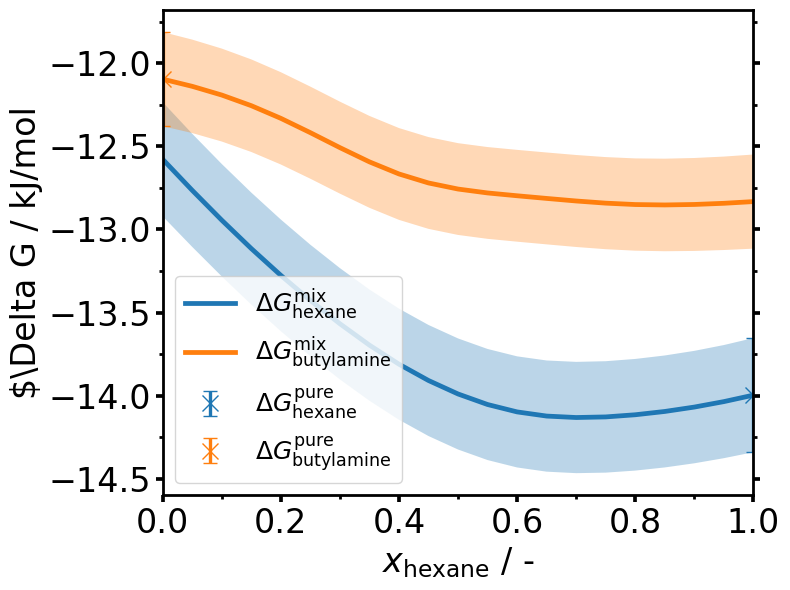


coulomb part of the solvation free energy


Gather simulation data for component: butylamine

Composition 0.0
Composition 0.1
Composition 0.2
Composition 0.3
Composition 0.4
Composition 0.5
Composition 0.6
Composition 0.7
Composition 0.8
Composition 0.9
Composition 1.0

2D Multi-fidelity modeling for component: butylamine

Optimization restart 1/2, f = -1827.6727086792519


 /home/st/st_st/st_st163811/miniconda3/lib/python3.10/site-packages/GPy/kern/src/stationary.py:144: RuntimeWarning:overflow encountered in square
 /home/st/st_st/st_st163811/miniconda3/lib/python3.10/site-packages/GPy/kern/src/stationary.py:145: RuntimeWarning:overflow encountered in square
 /home/st/st_st/st_st163811/miniconda3/lib/python3.10/site-packages/GPy/kern/src/stationary.py:146: RuntimeWarning:invalid value encountered in add


Optimization restart 2/2, f = -1711.159955994026

Low fidelity variance: 272505.609
Low fidelity lengthscales: 67.039, 35.048
High fidelity variance: 101439.769
High fidelity lengthscales: 26.441, 182.039
Phi parameter: 0.004
Low fidelity noise: 0.000
High fidelity noise: 0.001


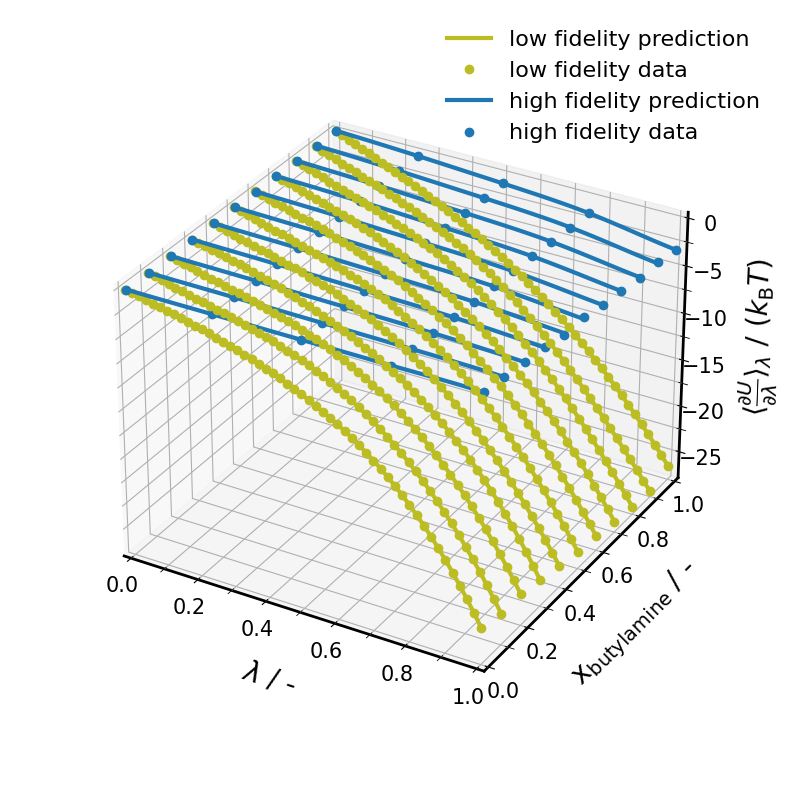

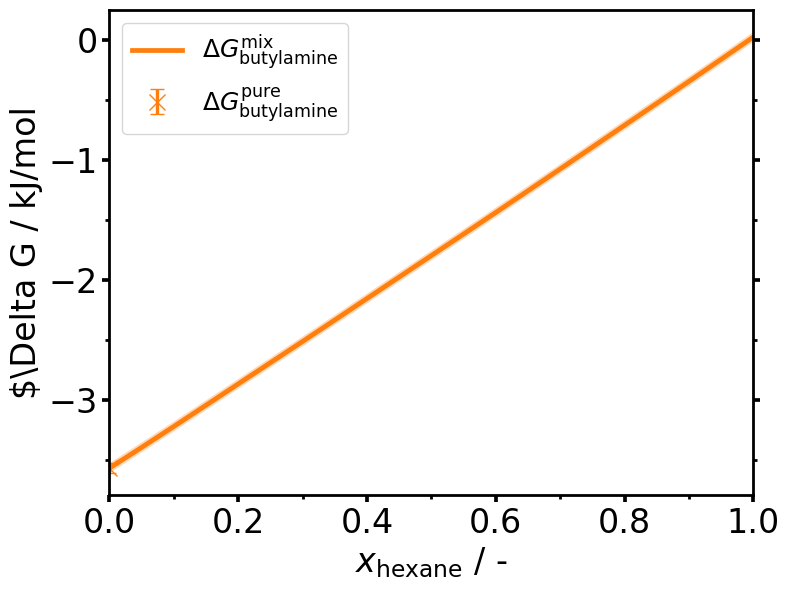

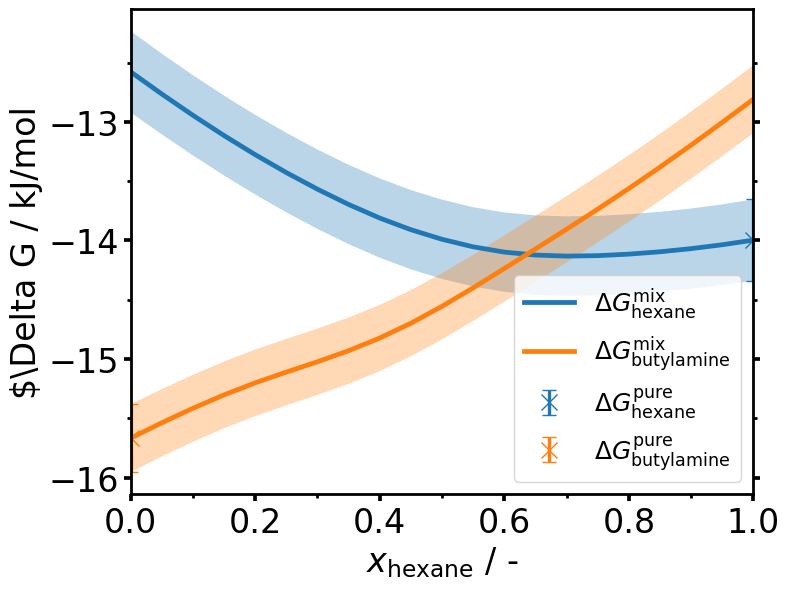

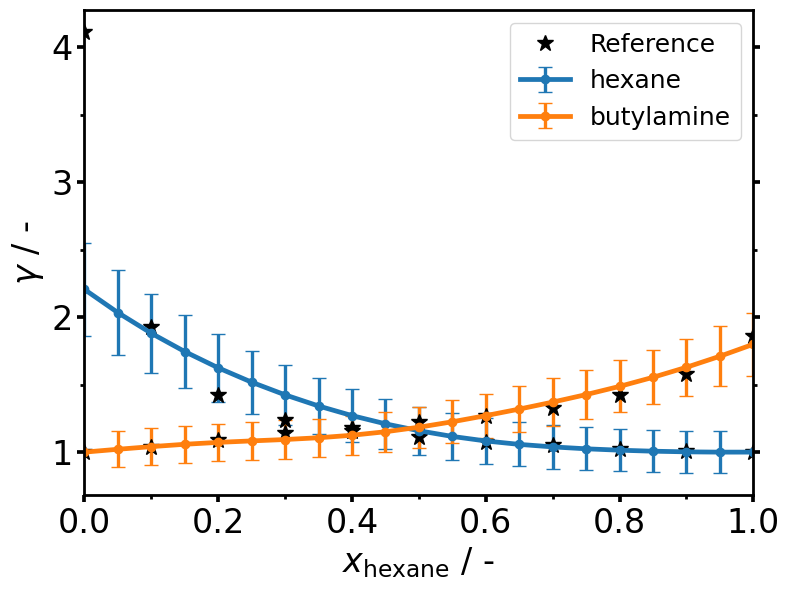

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


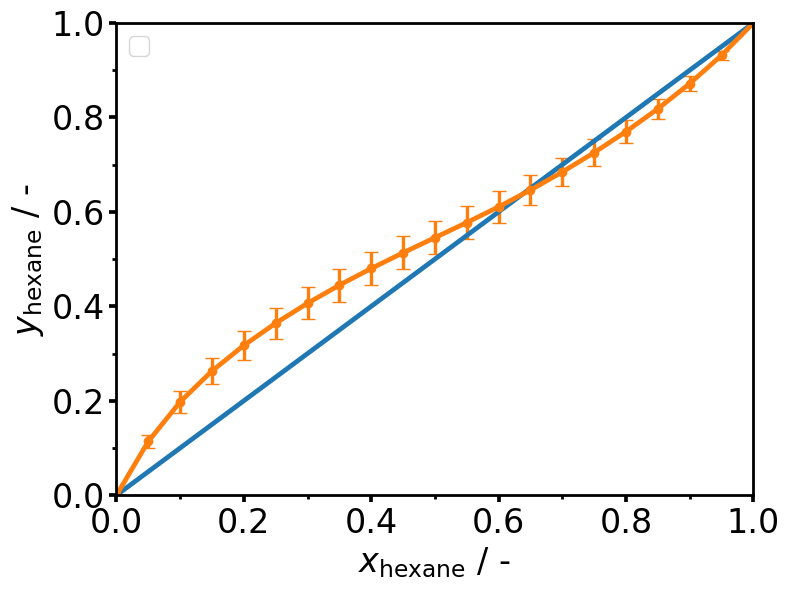

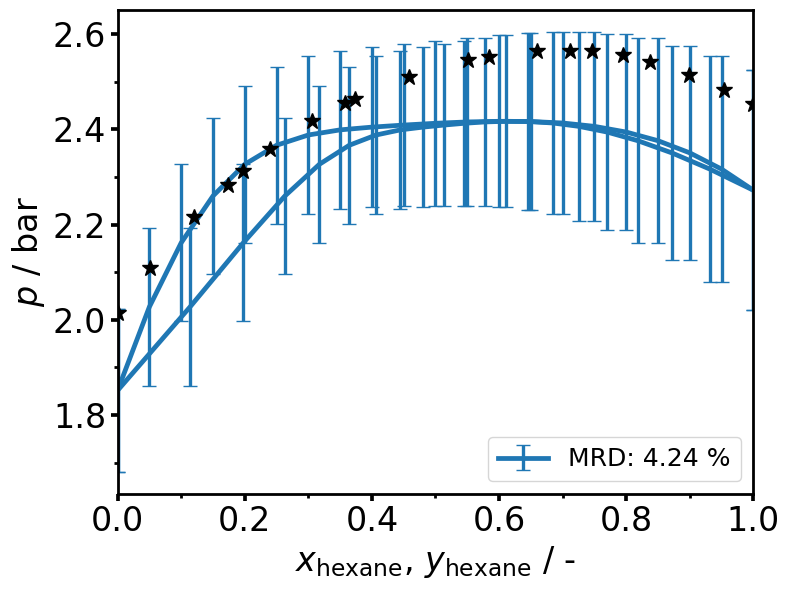

In [3]:
## Define output dictionary ##

results_dict = {}

#### Compute free solvation energy [J/mol] and gather mixture density [g/cm^3] in every composition ####

settings_dict = { "sim_path": sim_path, "components": components, "charged": ref_dict[mixture]["charged"], 
                  "free_eng_method": free_eng_method, "compositions": ref_dict[mixture][dict_key]["post_processing"]["x1"], 
                  "no_composition": no_composition, "temperatures": ref_dict[mixture][dict_key]["temp"], 
                  "sim_lambdas": ref_dict[mixture][dict_key]["lambdas"], "delta": delta, "both_ways": both_ways, 
                  "dG_save_path": dG_save_path, "lf_databanks": lf_databanks,  "lf_mixtures": lf_mixtures, 
                  "lf_unique_keys": lf_unique_keys, "lengthscales": lengthscales, "fix_lengthscale": fix_lengthscale, 
                  "fix_hf_noise": fix_hf_noise, "fraction": fraction, "verbose": show }

delta_G_mix, dG_std_mix, dens_mix, temperatures, x1 =  get_delta_fe( **settings_dict )

## Convert from mass density [g/cm^3] to molare density [mol/m^3] ##

Avg_mol_mass = np.array([np.sum( Mol_masses*np.array([x,(1-x)]) ) for x in x1 ])

dens_mix     = dens_mix / Avg_mol_mass * 10**6 

## Define pure component properties ##

delta_G_pure  = np.array([ delta_G_mix[0][-1], delta_G_mix[1][0] ])
dG_std_pure   = np.array([ dG_std_mix[0][-1], dG_std_mix[1][0] ])
dens_pure     = np.array([ dens_mix[-1], dens_mix[0] ])

#### Compute activity coefficients [-] ####

settings_dict = { "components": components, "x1": x1, "temperatures": temperatures, "dG_mix": delta_G_mix, "dG_pure": delta_G_pure,
                  "dG_std_mix": dG_std_mix, "dG_std_pure": dG_std_pure, "density_mix": dens_mix, "density_pure": dens_pure,
                  "x_ref": gamma_x_ref, "gamma1_ref": gamma1_ref, "gamma2_ref": gamma2_ref, "save_path": gamma_save_path }

gamma, gamma_std = compute_gamma( **settings_dict )

#### Compute vapor mole fraction of component one [-] ####

settings_dict = { "component": components[0], "x1": x1, "temperatures": temperatures, "dG_mix": delta_G_mix,
                  "dG_std_mix": dG_std_mix, "x_ref": gamma_x_ref, "y_ref": y_ref, "save_path": y1_save_path }

alpha, alpha_std, y1, y1_std = compute_vapor_mole_fraction( **settings_dict )


#### Compute p-x or T-x diagramm ####

if p_x:
    settings_dict = { "component": components[0], "x1": x1, "temperatures": temperatures, "y1": y1, 
                      "dG_mix": delta_G_mix, "dG_std_mix": dG_std_mix, "density_mix": dens_mix, 
                      "x_ref": x_ref, "y_ref": y_ref, "p_ref": p_ref, "save_path": p_save_path }

    p_equib, p_equib_std    = compute_equilibrium_pressure( **settings_dict )

    results_dict["p_equib"] = [ [a.tolist() for a in p_equib], [a.tolist() for a in p_equib_std] ]

else:
    settings_dict = { "component": components[0], "x1": x1, "temperatures": temperatures, "y1": y1, "y1_std": y1_std,
                      "x_ref": x_ref, "y_ref": y_ref, "t_ref": p_ref, "save_path": T_save_path }
    
    compute_equilibrium_temperatures( **settings_dict )


#### Save computed properties in json file  ####

results_dict["deltaG"]    = [ [a.tolist() for a in delta_G_mix], [a.tolist() for a in dG_std_mix] ]
results_dict["dens_mole"] = [ [a.tolist() for a in dens_mix] ]
results_dict["dens_mass"] = [ [(a*b/1000).tolist() for a,b in zip(dens_mix,Avg_mol_mass)] ]
results_dict["gamma"]     = [ [a.tolist() for a in gamma], [a.tolist() for a in gamma_std] ]
results_dict["alpha"]     = [ [a.tolist() for a in alpha], [a.tolist() for a in alpha_std] ]
results_dict["y1"]        = [ [a.tolist() for a in y1], [a.tolist() for a in y1_std] ]
results_dict["x1"]        = [ a.tolist() for a in x1 ]

json_path = json_save_path

work_json(json_path,results_dict,to_do="write")

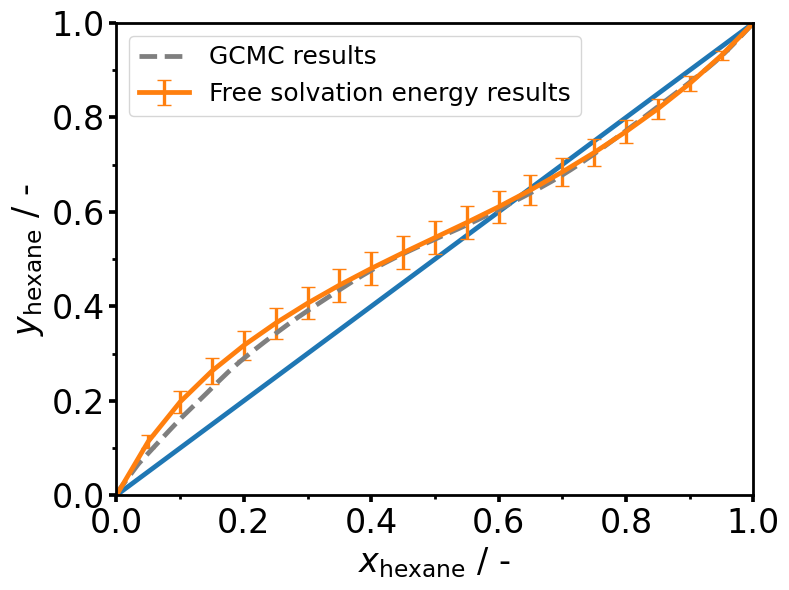

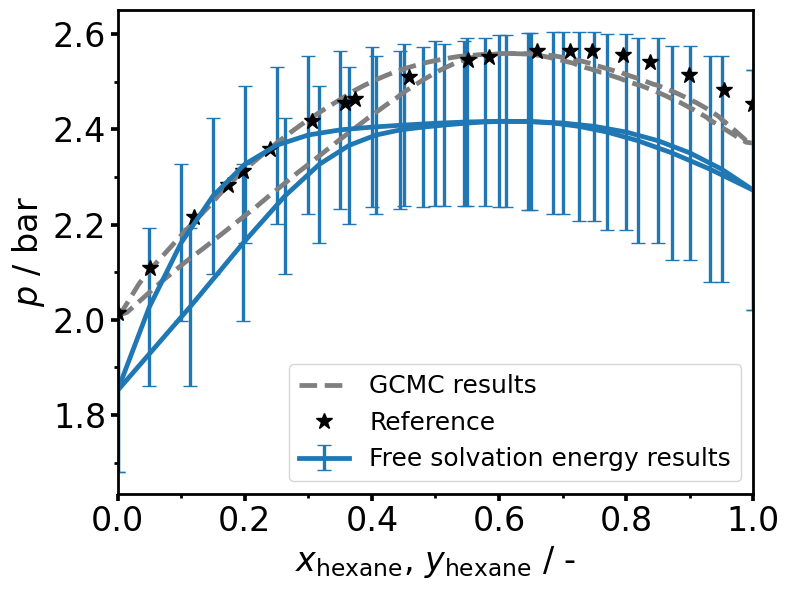

In [4]:
### Plot gcmc reference data ###

with open(main+"/"+mixture+"/"+dict_key+"/results/hr_results.json") as f_mc: hr_data = json.load(f_mc)

with open(main+"/"+mixture+"/"+dict_key+"/results/free_eng_pp_results.json") as f_fe: fe_data = json.load(f_fe)

## y-x ##
data   = [ [fe_data["x1"],fe_data["x1"]], [fe_data["x1"],fe_data["y1"][0],None,fe_data["y1"][1]], [hr_data["liquid"],hr_data["vapor"]], [x_ref,y_ref] ]

labels = [ "", "Free solvation energy results", "GCMC results", "Reference" , "$x_\mathrm{%s}$ / -"%components[0], "$y_\mathrm{%s}$ / -"%components[0] ]

colors = [ "tab:blue", "tab:orange", "tab:gray", "black" ]
ls     = [ "solid", "solid", "dashed", "None"]
marker = [ "None", "None", "None", "*" ]

save_path = main+"/"+mixture+"/"+dict_key+"/results/mc_thiele_w_GCMC.png"

plot_data(data,labels,colors,save_path,ax_lim=[[0.0,1.0],[0.0,1.0]],linestyle=ls,markerstyle=marker)

## P-x ##

data   = [ [fe_data["x1"],fe_data["p_equib"][0],None,fe_data["p_equib"][1]], 
           [fe_data["y1"][0],fe_data["p_equib"][0],None,fe_data["p_equib"][1]],
           [hr_data["liquid"],hr_data["pressure"]],
           [hr_data["vapor"],hr_data["pressure"]], 
           [x_ref,p_ref], [y_ref,p_ref],
            ]

labels = [ "Free solvation energy results", "", "GCMC results", "", "Reference", "","$x_\mathrm{%s}$, $y_\mathrm{%s}$ / -"%(components[0],components[0]), "$p$ / bar" ]
colors = [ "tab:blue", "tab:blue", "tab:gray", "tab:gray", "black", "black" ]
ls     = [ "solid", "solid", "dashed", "dashed", "None", "None"]
marker = [ "None", "None", "None", "None", "*", "*" ]

save_path = main+"/"+mixture+"/"+dict_key+"/results/p_x_w_GCMC.png"

plot_data(data,labels,colors,save_path,ax_lim=[[0.0,1.0]],linestyle=ls,markerstyle=marker)

In [5]:
# ## Plot using p_sat2 from GCMC:

# p_hat_error1 = np.sqrt( gamma_std[0]**2 * (x1*p_equib[-1]/y1)**2 + p_equib_std[-1]**2 * (x1*gamma[0]/y1)**2 + \
#                         y1_std**2 * (-x1*gamma[0]*p_equib[-1]/y1**2)**2 )

# # Error from x2 perspective
# p_hat_error2 = np.sqrt( gamma_std[1]**2 * ((1-x1)*p_equib[0]/(1-y1))**2 + p_equib_std[0]**2 * ((1-x1)*gamma[1]/(1-y1))**2 + \
#                     y1_std**2 * (-(1-x1)*gamma[1]*p_equib[0]/(1-y1)**2)**2 )


# # Pressure from component 1 perspective and from component 2 perspective are equal except the boundaries, therefore total pressure #
# # Takes mean of both in middle and take the boundaries of each when x1/x2 ≠ 0.0 #



# p_hat_x1 = x1*gamma[0]*p_equib[-1]/y1
# p_hat_x1 = x1*gamma[0]*hr_data["pressure"][-1]/y1
# p_hat_x2 = (1-x1)*gamma[1]*p_equib[0]/(1-y1)

# p_hat    = np.array( [p_hat_x2[0]] + list(np.mean([p_hat_x1[1:-1],p_hat_x2[1:-1]],axis=0)) + [p_hat_x1[-1]] )


# p_hat_x1[0] = p_hat_x2[0]

# # Same for error

# # Total error: use error from x1 and only in x1=0 error from x2 or the other way arround (should be same in good simulation)

# p_hat_error = np.array( [p_hat_error2[0]] + list( np.sqrt( (0.5*p_hat_error1[1:-1])**2 + (0.5*p_hat_error2[1:-1])**2 ) ) + [p_hat_error1[-1]] )

# p_hat_error[np.array([1,3,5,7,9,11,13,15,17,19])] = None

# data   = [ [fe_data["x1"],p_hat_x1,None,p_hat_error], 
#            [fe_data["y1"][0],p_hat_x1,None,p_hat_error],
#            [hr_data["liquid"],hr_data["pressure"]],
#            [hr_data["vapor"],hr_data["pressure"]], 
#            [x_ref,p_ref], [y_ref,p_ref],
#             ]

# labels = [ "Free solvation energy results", "", "GCMC results", "","Reference", "","$x_\mathrm{%s}$, $y_\mathrm{%s}$ / -"%(settings["components"][0],settings["components"][0]), "$p$ / bar" ]
# colors = [ "tab:blue", "tab:blue", "tab:gray", "tab:gray", "black", "black" ]
# ls     = [ "solid", "solid", "dashed", "dashed", "None", "None"]
# marker = [ "None", "None", "None", "None", "*", "*" ]

# save_path = main+"/"+mixture+"/"+dict_key+"/results/p_x_w_GCMC_shifted_p1.png"

# plot_data(data,labels,colors,save_path,ax_lim=[[0.0,1.0]],linestyle=ls,markerstyle=marker)